# Goals of Carvana Analysis
1. Basic data exploration
2. Apply a basic model
3. Describe plan to improve model performance

## Basic Data Exploration

In [58]:
import os

import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 40)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 40)

   # DATE TIME
from datetime import datetime

   # PLOTTING
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

   # K NEAREST NEIGHBORS and LINEAR REGRESSION
from sklearn import preprocessing, linear_model, model_selection, metrics
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection, linear_model

In [59]:
df = pd.read_csv('training.csv')

In [3]:
   # two of the columns identified in the documentation do not appear in the data:  AcquisitionType, KickDate
df.columns

Index([u'RefId', u'IsBadBuy', u'PurchDate', u'Auction', u'VehYear',
       u'VehicleAge', u'Make', u'Model', u'Trim', u'SubModel', u'Color',
       u'Transmission', u'WheelTypeID', u'WheelType', u'VehOdo',
       u'Nationality', u'Size', u'TopThreeAmericanName',
       u'MMRAcquisitionAuctionAveragePrice',
       u'MMRAcquisitionAuctionCleanPrice', u'MMRAcquisitionRetailAveragePrice',
       u'MMRAcquisitonRetailCleanPrice', u'MMRCurrentAuctionAveragePrice',
       u'MMRCurrentAuctionCleanPrice', u'MMRCurrentRetailAveragePrice',
       u'MMRCurrentRetailCleanPrice', u'PRIMEUNIT', u'AUCGUART', u'BYRNO',
       u'VNZIP1', u'VNST', u'VehBCost', u'IsOnlineSale', u'WarrantyCost'],
      dtype='object')

In [4]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [5]:
  # about 73K records
# What is the rate of "IsBadBuy"?
    # 8976 / 64007 = 14%   
    # this is not so low.  could try making the sample more even so that the IsBadBuy is closer to 50%
df.IsBadBuy.value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [6]:
   # for now can drop Trim, WheelType
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0


In [8]:
   # format PurchDate   fix this later ValueError: unconverted data remains: 09.  use VehYear instead.
#  df['PurchaseDate']=df['PurchDate'].apply(lambda \ PurchDate: datetime.strptime(PurchDate, '%m/%d/%y'))

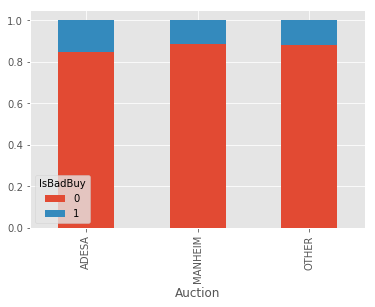

In [60]:
   # Auction location 
# MANHEIM    41043
# OTHER      17501
# ADESA      14439
# df.Auction.value_counts()
    # Adesa has higher IsBadBuy rate of 15%, so use get dummies
#pd.crosstab(df.IsBadBuy, df.Auction)
pd.crosstab(df.IsBadBuy, df.Auction).apply(lambda r: r/r.sum(), axis=0)
auction_graph = pd.crosstab(df.Auction, df.IsBadBuy)
auction_graph.div(auction_graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

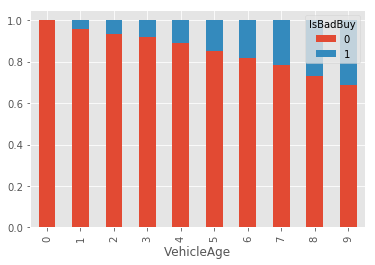

In [63]:
   # VehYear
    # basically linear with vehicle year. use vehicleage 
#pd.crosstab(df.IsBadBuy, df.VehicleAge)
pd.crosstab(df.IsBadBuy, df.VehicleAge).apply(lambda r: r/r.sum(), axis=0)
vehage_graph = pd.crosstab(df.VehicleAge, df.IsBadBuy)
vehage_graph.div(vehage_graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

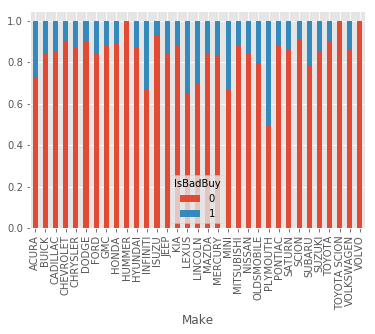

In [64]:
    # Make
    # significant variation across make.  Top 5:  Chevrolet, Chrysler, Dodge, Ford, Pontiac. Other. Take these for now
#df.Make.value_counts()
#pd.crosstab(df.IsBadBuy, df.Make).transpose()
pd.crosstab(df.IsBadBuy, df.Make).apply(lambda r: r/r.sum(), axis=0).transpose()
make_graph = pd.crosstab(df.Make, df.IsBadBuy)
make_graph.div(make_graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

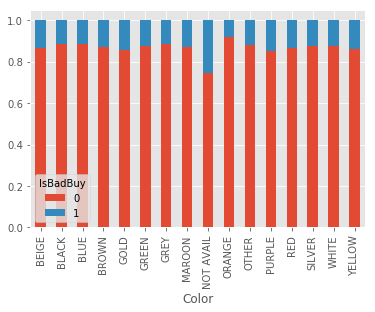

In [65]:
    # Color  
    # Top 5:  Silver, White, Blue, Grey, Black are about the same.  Only if Not Avail is it significant.
#df.Color.value_counts()
#pd.crosstab(df.IsBadBuy, df.Color)
pd.crosstab(df.IsBadBuy, df.Color).apply(lambda r: r/r.sum(), axis=0) 
color_graph = pd.crosstab(df.Color, df.IsBadBuy)
color_graph.div(color_graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

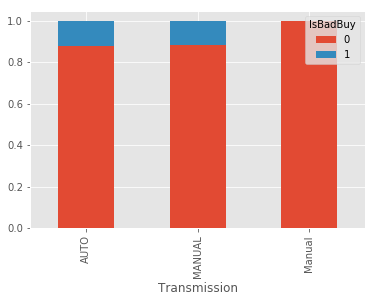

In [66]:
    # Transmission
    # pretty close.   get dummies.
pd.crosstab(df.IsBadBuy, df.Transmission).apply(lambda r: r/r.sum(), axis=0) 
trans_graph = pd.crosstab(df.Transmission, df.IsBadBuy)
trans_graph.div(trans_graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

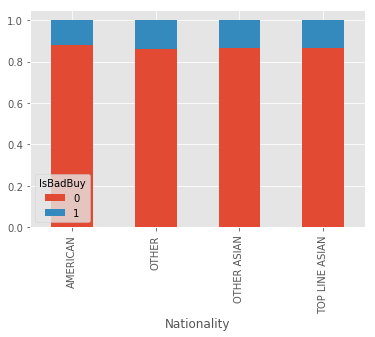

In [67]:
    # Nationality
    # include as get dummies.
df.Nationality.value_counts()    
#pd.crosstab(df.IsBadBuy, df.Nationality)    
pd.crosstab(df.IsBadBuy, df.Nationality).apply(lambda r: r/r.sum(), axis=0)  
nation_graph = pd.crosstab(df.Nationality, df.IsBadBuy)
nation_graph.div(nation_graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

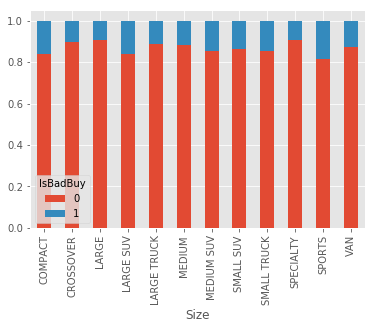

In [68]:
    # Size
    # keep  Top 5:  Medium, Large, Medium SUV, Compact, Van, Other --use these
df.Size.value_counts()
pd.crosstab(df.IsBadBuy, df.Size).apply(lambda r: r/r.sum(), axis=0)  
size_graph = pd.crosstab(df.Size, df.IsBadBuy)
size_graph.div(size_graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

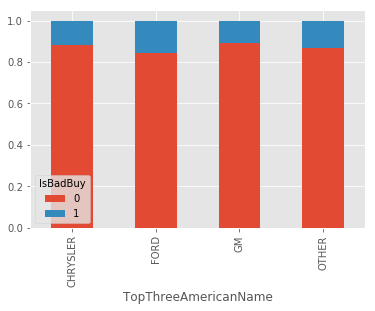

In [69]:
    # TopThreeAmericanName
    # repeat of make
df.TopThreeAmericanName.value_counts()    
pd.crosstab(df.IsBadBuy, df.TopThreeAmericanName).apply(lambda r: r/r.sum(), axis=0)  
top3_graph = pd.crosstab(df.TopThreeAmericanName, df.IsBadBuy)
top3_graph.div(top3_graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [17]:
    # PRIMEUNIT and AUCGUART have lots of NaN.  Ignore
    # Lots of NaN.  Not enough data
#df.PRIMEUNIT.fillna(0, inplace=True) 
pd.crosstab(df.IsBadBuy, df.PRIMEUNIT)
#pd.crosstab(df.IsBadBuy, df.PRIMEUNIT).apply(lambda r: r/r.sum(), axis=0)  

PRIMEUNIT,NO,YES
IsBadBuy,,
0,3230,56
1,127,6


In [18]:
    #VNZIP1 is too many. Try Zip3 later.
    #VNST is easier.  Top 5:  TX, FL, CA, NC, AZ.  Take CA, TX, other for now.
df.VNST.value_counts()
pd.crosstab(df.IsBadBuy, df.VNST).apply(lambda r: r/r.sum(), axis=0).transpose()

IsBadBuy,0,1
VNST,,
AL,0.872464,0.127536
AR,0.771429,0.228571
AZ,0.885973,0.114027
CA,0.865962,0.134038
CO,0.879152,0.120848
FL,0.890686,0.109314
GA,0.888571,0.111429
IA,0.853707,0.146293
ID,0.903061,0.096939


In [19]:
  # use corr for remaining numerical variables
    # top ones are VehOdo, VehicleAge, and pick one of MMR ones:  MMRAcquisitionAuctionAveragePrice 
df.corr()   

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.023973,0.010580,-0.025404,0.013110,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsBadBuy,0.023973,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,0.010580,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.013110,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,-0.026553,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


In [20]:
    # MMRAcquisitionAuctionAveragePrice  need to replace these with average.  Ignore for now.
    #  828 records with 0
#len(df[df.MMRAcquisitionAuctionAveragePrice==0])
    # 697 records with 0
#len(df[df.MMRAcquisitionAuctionCleanPrice==0])
     #828 records with 0
#len(df[df.MMRAcquisitionRetailAveragePrice==0])
     #828 records with 0
#len(df[df.MMRAcquisitonRetailCleanPrice==0])
     #828 records with 0
#len(df[df.MMRAcquisitonRetailCleanPrice==0])
     #504 records with 0
#len(df[df.MMRCurrentAuctionAveragePrice==0])
    # 378 records with 0
#len(df[df.MMRCurrentAuctionCleanPrice==0])
   # 504 records with 0
#len(df[df.MMRCurrentRetailAveragePrice==0])
   # 504 records with 0
len(df[df.MMRCurrentRetailCleanPrice==0])
   # 7429.3272513487345
df['MMRCurrentAuctionCleanPrice'][df.MMRCurrentAuctionCleanPrice>0].mean()

7429.3272513487345

## Apply Basic Model

In [21]:
   # Auction  
auction_df = pd.get_dummies(df.Auction, prefix = 'Auction')
df = df.join(auction_df)
df.drop(['Auction'], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER
0,1,0,12/7/2009,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,1,0,0
1,2,0,12/7/2009,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,1,0,0
2,3,0,12/7/2009,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,1,0,0
3,4,0,12/7/2009,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,1,0,0
4,5,0,12/7/2009,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,1,0,0


In [22]:
   # Make
df.loc[~df.Make.isin(['CHEVROLET','CHRYSLER','DODGE','FORD']),'Make'] = 'OTHER'
make_df = pd.get_dummies(df.Make, prefix = 'Make')
df = df.join(make_df)
df.drop(['Make'], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER
0,1,0,12/7/2009,2006,3,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,1,0,0,0,0,0,0,1
1,2,0,12/7/2009,2004,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,1,0,0,0,0,1,0,0
2,3,0,12/7/2009,2005,4,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,1,0,0,0,0,1,0,0
3,4,0,12/7/2009,2004,5,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,1,0,0,0,0,1,0,0
4,5,0,12/7/2009,2005,4,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,1,0,0,0,0,0,1,0


In [23]:
  # Size
df.loc[~df.Size.isin(['MEDIUM LARGE','MEDIUM SUV','COMPACT','VAN']),'Size'] = 'OTHER'
size_df = pd.get_dummies(df.Size, prefix = 'Size')
df = df.join(size_df)
df.drop(['Size'], axis=1, inplace=True) 
df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER,Size_COMPACT,Size_MEDIUM SUV,Size_OTHER,Size_VAN
0,1,0,12/7/2009,2006,3,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,...,NaN,NaN,21973,33619,FL,7100.0,0,1113,1,0,0,0,0,0,0,1,0,0,1,0
1,2,0,12/7/2009,2004,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,...,NaN,NaN,19638,33619,FL,7600.0,0,1053,1,0,0,0,0,1,0,0,0,0,1,0
2,3,0,12/7/2009,2005,4,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,...,NaN,NaN,19638,33619,FL,4900.0,0,1389,1,0,0,0,0,1,0,0,0,0,1,0
3,4,0,12/7/2009,2004,5,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,...,NaN,NaN,19638,33619,FL,4100.0,0,630,1,0,0,0,0,1,0,0,1,0,0,0
4,5,0,12/7/2009,2005,4,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,...,NaN,NaN,19638,33619,FL,4000.0,0,1020,1,0,0,0,0,0,1,0,1,0,0,0


In [24]:
  # Transmission
df.loc[df.Transmission=='Manual','Transmission'] = 'MANUAL'
trans_df = pd.get_dummies(df.Transmission, prefix = 'trans')
df = df.join(trans_df)
df.drop(['Transmission'], axis=1, inplace=True)  
df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Model,Trim,SubModel,Color,WheelTypeID,WheelType,VehOdo,Nationality,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER,Size_COMPACT,Size_MEDIUM SUV,Size_OTHER,Size_VAN,trans_AUTO,trans_MANUAL
0,1,0,12/7/2009,2006,3,MAZDA3,i,4D SEDAN I,RED,1.0,Alloy,89046,OTHER ASIAN,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,...,21973,33619,FL,7100.0,0,1113,1,0,0,0,0,0,0,1,0,0,1,0,1,0
1,2,0,12/7/2009,2004,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,1.0,Alloy,93593,AMERICAN,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,...,19638,33619,FL,7600.0,0,1053,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,3,0,12/7/2009,2005,4,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,2.0,Covers,73807,AMERICAN,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,...,19638,33619,FL,4900.0,0,1389,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,4,0,12/7/2009,2004,5,NEON,SXT,4D SEDAN,SILVER,1.0,Alloy,65617,AMERICAN,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,...,19638,33619,FL,4100.0,0,630,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4,5,0,12/7/2009,2005,4,FOCUS,ZX3,2D COUPE ZX3,SILVER,2.0,Covers,69367,AMERICAN,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,...,19638,33619,FL,4000.0,0,1020,1,0,0,0,0,0,1,0,1,0,0,0,0,1


In [25]:
  # Nationality
nation_df = pd.get_dummies(df.Nationality, prefix = 'nation')
df = df.join(nation_df)
df.drop(['Nationality'], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Model,Trim,SubModel,Color,WheelTypeID,WheelType,VehOdo,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER,Size_COMPACT,Size_MEDIUM SUV,Size_OTHER,Size_VAN,trans_AUTO,trans_MANUAL,nation_AMERICAN,nation_OTHER,nation_OTHER ASIAN,nation_TOP LINE ASIAN
0,1,0,12/7/2009,2006,3,MAZDA3,i,4D SEDAN I,RED,1.0,Alloy,89046,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,...,0,1113,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1,2,0,12/7/2009,2004,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,1.0,Alloy,93593,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,...,0,1053,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
2,3,0,12/7/2009,2005,4,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,2.0,Covers,73807,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,...,0,1389,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
3,4,0,12/7/2009,2004,5,NEON,SXT,4D SEDAN,SILVER,1.0,Alloy,65617,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,...,0,630,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
4,5,0,12/7/2009,2005,4,FOCUS,ZX3,2D COUPE ZX3,SILVER,2.0,Covers,69367,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,...,0,1020,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0


In [26]:
  # VNST
df.loc[~df.VNST.isin(['CA','TX']),'VNST'] = 'OTHER'
vnst_df = pd.get_dummies(df.VNST, prefix = 'VNST')
df = df.join(vnst_df)
df.drop(['VNST'], axis=1, inplace=True)
df.head()                         

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Model,Trim,SubModel,Color,WheelTypeID,WheelType,VehOdo,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,Auction_MANHEIM,Auction_OTHER,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER,Size_COMPACT,Size_MEDIUM SUV,Size_OTHER,Size_VAN,trans_AUTO,trans_MANUAL,nation_AMERICAN,nation_OTHER,nation_OTHER ASIAN,nation_TOP LINE ASIAN,VNST_CA,VNST_OTHER,VNST_TX
0,1,0,12/7/2009,2006,3,MAZDA3,i,4D SEDAN I,RED,1.0,Alloy,89046,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,2,0,12/7/2009,2004,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,1.0,Alloy,93593,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,3,0,12/7/2009,2005,4,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,2.0,Covers,73807,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,4,0,12/7/2009,2004,5,NEON,SXT,4D SEDAN,SILVER,1.0,Alloy,65617,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,5,0,12/7/2009,2005,4,FOCUS,ZX3,2D COUPE ZX3,SILVER,2.0,Covers,69367,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0


In [27]:
# MMRCurrentAuctionCleanPrice
       # 7429.3272513487345
df['MMRCurrentAuctionCleanPrice'][df.MMRCurrentAuctionCleanPrice>0].mean()
df.loc[df.MMRCurrentAuctionCleanPrice==0,'MMRCurrentAuctionCleanPrice'] = \
   df['MMRCurrentAuctionCleanPrice'][df.MMRCurrentAuctionCleanPrice>0].mean()
df.MMRCurrentAuctionCleanPrice.fillna(df['MMRCurrentAuctionCleanPrice'][df.MMRCurrentAuctionCleanPrice>0].mean(), \
                                    inplace = True)
df[ ['MMRCurrentAuctionCleanPrice'] ] = df [ ['MMRCurrentAuctionCleanPrice'] ].apply(lambda x: x/(36859-5414))
df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Model,Trim,SubModel,Color,WheelTypeID,WheelType,VehOdo,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,Auction_MANHEIM,Auction_OTHER,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER,Size_COMPACT,Size_MEDIUM SUV,Size_OTHER,Size_VAN,trans_AUTO,trans_MANUAL,nation_AMERICAN,nation_OTHER,nation_OTHER ASIAN,nation_TOP LINE ASIAN,VNST_CA,VNST_OTHER,VNST_TX
0,1,0,12/7/2009,2006,3,MAZDA3,i,4D SEDAN I,RED,1.0,Alloy,89046,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,0.271967,11597.0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,2,0,12/7/2009,2004,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,1.0,Alloy,93593,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,0.293274,11374.0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,3,0,12/7/2009,2005,4,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,2.0,Covers,73807,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,0.176721,7146.0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,4,0,12/7/2009,2004,5,NEON,SXT,4D SEDAN,SILVER,1.0,Alloy,65617,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,0.084147,4375.0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,5,0,12/7/2009,2005,4,FOCUS,ZX3,2D COUPE ZX3,SILVER,2.0,Covers,69367,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,0.139418,6739.0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0


In [28]:
# VehOdo
df[ ['VehOdo'] ] = df [ ['VehOdo'] ].apply(lambda x: x/(115717-61837))
df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Model,Trim,SubModel,Color,WheelTypeID,WheelType,VehOdo,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,Auction_MANHEIM,Auction_OTHER,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER,Size_COMPACT,Size_MEDIUM SUV,Size_OTHER,Size_VAN,trans_AUTO,trans_MANUAL,nation_AMERICAN,nation_OTHER,nation_OTHER ASIAN,nation_TOP LINE ASIAN,VNST_CA,VNST_OTHER,VNST_TX
0,1,0,12/7/2009,2006,3,MAZDA3,i,4D SEDAN I,RED,1.0,Alloy,1.652673,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,0.271967,11597.0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,2,0,12/7/2009,2004,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,1.0,Alloy,1.737064,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,0.293274,11374.0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,3,0,12/7/2009,2005,4,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,2.0,Covers,1.369840,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,0.176721,7146.0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,4,0,12/7/2009,2004,5,NEON,SXT,4D SEDAN,SILVER,1.0,Alloy,1.217836,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,0.084147,4375.0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,5,0,12/7/2009,2005,4,FOCUS,ZX3,2D COUPE ZX3,SILVER,2.0,Covers,1.287435,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,0.139418,6739.0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0


In [29]:
# WarrantyCost
df[ ['WarrantyCost'] ] = df [ ['WarrantyCost'] ].apply(lambda x: x/(7498-462))
df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Model,Trim,SubModel,Color,WheelTypeID,WheelType,VehOdo,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,Auction_MANHEIM,Auction_OTHER,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER,Size_COMPACT,Size_MEDIUM SUV,Size_OTHER,Size_VAN,trans_AUTO,trans_MANUAL,nation_AMERICAN,nation_OTHER,nation_OTHER ASIAN,nation_TOP LINE ASIAN,VNST_CA,VNST_OTHER,VNST_TX
0,1,0,12/7/2009,2006,3,MAZDA3,i,4D SEDAN I,RED,1.0,Alloy,1.652673,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,0.271967,11597.0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,2,0,12/7/2009,2004,5,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,1.0,Alloy,1.737064,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,0.293274,11374.0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,3,0,12/7/2009,2005,4,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,2.0,Covers,1.369840,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,0.176721,7146.0,...,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,4,0,12/7/2009,2004,5,NEON,SXT,4D SEDAN,SILVER,1.0,Alloy,1.217836,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,0.084147,4375.0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,5,0,12/7/2009,2005,4,FOCUS,ZX3,2D COUPE ZX3,SILVER,2.0,Covers,1.287435,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,0.139418,6739.0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0


In [42]:
X = df[['Auction_ADESA', 'Auction_MANHEIM',
        'Make_CHEVROLET', 'Make_CHRYSLER','Make_DODGE','Make_FORD',
        'Size_COMPACT','Size_MEDIUM SUV','Size_VAN',
        'trans_AUTO',
        'nation_AMERICAN','nation_OTHER ASIAN','nation_TOP LINE ASIAN',
        'VNST_CA','VNST_TX',
        'MMRCurrentAuctionCleanPrice',
        'VehicleAge',
        'VehOdo',
        'WarrantyCost'
]]

In [43]:
   # check that we do not have any null values
X.isnull().sum()

Auction_ADESA                  0
Auction_MANHEIM                0
Make_CHEVROLET                 0
Make_CHRYSLER                  0
Make_DODGE                     0
Make_FORD                      0
Size_COMPACT                   0
Size_MEDIUM SUV                0
Size_VAN                       0
trans_AUTO                     0
nation_AMERICAN                0
nation_OTHER ASIAN             0
nation_TOP LINE ASIAN          0
VNST_CA                        0
VNST_TX                        0
MMRCurrentAuctionCleanPrice    0
VehicleAge                     0
VehOdo                         0
WarrantyCost                   0
dtype: int64

In [44]:
c = df.IsBadBuy

In [45]:
from sklearn import preprocessing 

independent_variables = X.columns.tolist()

for variable in independent_variables:
    X[variable] = preprocessing.scale(np.log(X[variable] + 1))

/Users/seanmcghee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
   # use logistic regression with recursive feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

logit = LogisticRegression()

estimator = LogisticRegression()
selector = RFECV(estimator)
selector = selector.fit(X[independent_variables],df['IsBadBuy'])

support = pd.DataFrame(data = selector.support_, index = X[independent_variables].columns, 
             columns = ['support']).query("support == True")
support

,support
Auction_ADESA,True
Auction_MANHEIM,True
Make_CHEVROLET,True
Make_CHRYSLER,True
Make_DODGE,True
Make_FORD,True
Size_COMPACT,True
Size_MEDIUM SUV,True
Size_VAN,True
trans_AUTO,True


In [47]:
   # selected L2 regularization.
model = linear_model.LogisticRegression(penalty='l2').fit(X, c)

print model.coef_
print model.intercept_

[[ 0.02968245 -0.12540938 -0.11547079  0.0862922  -0.01760001  0.03677838
   0.09796193  0.04256601 -0.02810428  0.05977505 -0.0122049   0.05031507
  -0.00664025  0.04752058  0.07507606 -0.0891703   0.43024763  0.12559902
   0.06632531]]
[-2.09511016]


In [48]:
  # 0.87701245495526359 with L2
model.score(X,c)

0.87701245495526359

In [49]:
logit_hat = model.intercept_ + (X * model.coef_[0]).sum(axis = 1)

In [50]:
((logit_hat >= 0) == (c == 1)).mean()

0.87701245495526359

In [51]:
odds_hat = np.exp(logit_hat)
p_hat = odds_hat / (1 + odds_hat)
c_hat = p_hat.round(0)

In [40]:
  # currently always predicting that it is not a Bad Buy.  
    # Always choosing Not a Bad Buy would typically yield 100-14 = 86% correct rate.
    # This model is only slightly better than always choosing Not a Bad Buy.
c_hat

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
        ... 
72963    0.0
72964    0.0
72965    0.0
72966    0.0
72967    0.0
72968    0.0
72969    0.0
72970    0.0
72971    0.0
72972    0.0
72973    0.0
72974    0.0
72975    0.0
72976    0.0
72977    0.0
72978    0.0
72979    0.0
72980    0.0
72981    0.0
72982    0.0
dtype: float64

In [52]:
    # I am curre
pd.crosstab(c_hat,
    c,
    rownames = ['Predicted'],
    colnames = ['Actual'])

Actual,0,1
Predicted,,
0.0,64007,8976


## Plan to Improve Model Performance

The model is currently always predicting that it is not a Bad Buy.  Always choosing Not a Bad Buy would typically yield 100-14 = 86% correct rate.  This model is only slightly better than always choosing Not a Bad Buy when looking at the training error.  The testing error will be worse.  

Possible ways to improve model performance:
1.  Model improvement   
   a. Use grid search on lambda for regularization using cross-validation 
   b. Use random forest to get idea of most important features  
   c. Use PCA to reduce number of features   
   d. Use K-NN if can get PCA down to 4 features   
2.  Data sample   
   a. Use sampling techniques to balance the dataset so that IsBadBuy is not only 14% of the dataset, e.g., SMOTE  
3.  Variable clean up    
   a. Add Color = Not Available
   b. Deal with null values for Trim, WheelType and add to feature set   
   c. Use more than the top 4-5 categories for each categorical variable      
   d. Consider interaction terms     
